# Quantized inverse dynamic for  Go -Explore

In [4]:
import gym_continuous_maze
from go_explore.inverse_dynamic_go_explore import GoExploreInverseModel
from stable_baselines3 import SAC

go_explore = GoExploreInverseModel(SAC, "ContinuousMaze-v0", verbose=1)
go_explore.explore(20_000)

Creating environment from the given name 'ContinuousMaze-v0'
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.2     |
|    ep_rew_mean     | -35.2    |
|    success_rate    | 0.75     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 84       |
|    time_elapsed    | 2        |
|    total_timesteps | 193      |
| train/             |          |
|    actor_loss      | -2.39    |
|    critic_loss     | 0.237    |
|    ent_coef        | 0.973    |
|    ent_coef_loss   | -0.0922  |
|    learning_rate   | 0.0003   |
|    n_updates       | 92       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | -24.8    |
|    success_rate    | 0.875    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 58       |
|    time_elapsed    | 5        |
|   

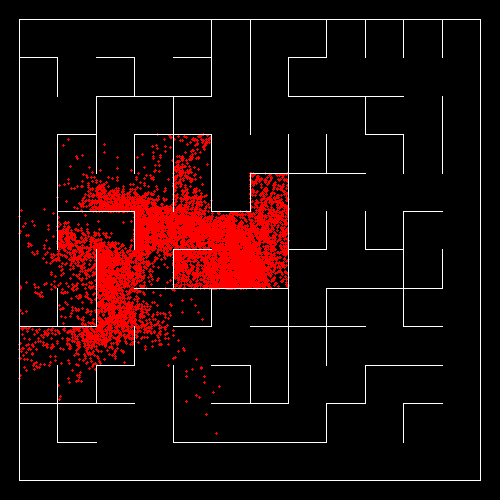

In [6]:
from IPython.display import display
from PIL import Image

img = go_explore.model.env.render("rgb_array")
display(Image.fromarray(img))

Show the observations and the qunatized latent space.

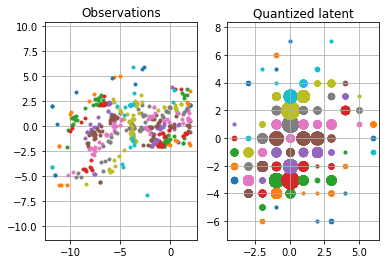

In [9]:
import matplotlib.pyplot as plt
import numpy as np

sample = go_explore.archive.sample(512)
observations = sample.observations["observation"].detach().cpu().numpy()
all_cells = sample.observations["cell"].detach().cpu().numpy()

cells, counts = np.unique(all_cells, return_counts=True, axis=0)

fig, axs = plt.subplots(1, 2)
# Observations
axs[0].grid()
axs[0].set_title("Observations")
axs[0].axis("equal")
for cell in cells:
    axs[0].plot(*observations[(all_cells == cell).all(1)].T, "o", markersize=3)

# Quantized latent
axs[1].grid()
axs[1].set_title("Quantized latent")
axs[1].axis("equal")
for cell, count in zip(cells, counts):
    axs[1].scatter(*all_cells[(all_cells == cell).all(1)].T, s=count * 10)

Render several trajecotries with various step parameter.

In [34]:
from src.render_maze import render_and_save

for step in [1, 2, 4, 8, 16]:
    for i in range(3):
        traj = go_explore.archive.sample_trajectory(step=step, count_pow=2)[0]
        render_and_save(go_explore.model.env.envs, "trajectory_step_{}_{}.bmp".format(step, i), trajectories=[traj])

Render various goals to see their repartion.

In [ ]:
for count_pow in [0.0, 0.5, 1, 1.2, 1.5, 2.0, 3.0]:
    goals = []
    for i in range(256):
        traj = go_explore.archive.sample_trajectory(count_pow=count_pow)[0]
        goals.append(traj[-1])
    render_and_save(go_explore.model.env.envs, "goals_pow_{}.bmp".format(count_pow), goals=goals)